<a href="https://colab.research.google.com/github/NguyenHoang127/AI_Exercise_All/blob/main/Project_AI_4_Face_Class_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
#Khai báo thư viện

#1.Thư viện tính toán và hiển thị 
import matplotlib.pyplot as plt
import numpy as np

#2.Thư viện xử lý hình 3 chiều thành dữ liệu dưới dạng số
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical

In [ ]:
folder = '/content/gdrive/MyDrive/Face_Data_train/Train'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0

  if file.startswith('AnhKiet'):
    output = 1
  if file.startswith('Binh'):
    output = 2
  if file.startswith('BuiKiet'):
    output = 3
  if file.startswith('ChiLoc'):
    output = 4
  if file.startswith('HQHuy'):
    output = 5
  if file.startswith('Hau'):
    output = 6
  if file.startswith('Hieu'):
    output = 7
  if file.startswith('HoaiPhong'):
    output = 8
  if file.startswith('HuuLong'):
    output = 9
  if file.startswith('KhoaBui'):
    output = 10
  if file.startswith('KyAnh'):
    output = 11
  if file.startswith('Luan'):
    output = 12
  if file.startswith('NgocThach'):
    output = 13
  if file.startswith('NGuyenHoang'):
    output = 14
  if file.startswith('NhatHuy'):
    output = 15
  if file.startswith('NhatSang'):
    output = 16
  if file.startswith('Phuc'):
    output = 17
  if file.startswith('PhucDung'):
    output = 18
  if file.startswith('QuangPhuc'):
    output = 19
  if file.startswith('SonTung'):
    output = 20
  if file.startswith('TanDat'):
    output = 21
  if file.startswith('TanLoc'):
    output = 22
  if file.startswith('TanPhat'):
    output = 23
  if file.startswith('TanThinh'):
    output = 24
  if file.startswith('Thai'):
    output = 25
  if file.startswith('Thang'):
    output = 26
  if file.startswith('Thanh'):
    output = 27
  if file.startswith('Thao'):
    output = 28
  if file.startswith('Tien'):
    output = 29
  if file.startswith('Trong'):
    output = 30
  if file.startswith('TuanKiet'):
    output = 31
  if file.startswith('Van'):
    output = 32
  if file.startswith('VietHa'):
    output = 33
  if file.startswith('VuThach'):
    output = 34

  photo = load_img(folder + '/' + file, target_size= (30,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)

save('/content/gdrive/MyDrive/Result_data_Face/face_photos.npy', photos)
save('/content/gdrive/MyDrive/Result_data_Face/face_labels.npy', labels)

(1700, 30, 40, 3) (1700,)


In [ ]:
# Khởi tạo và sử dụng dữ liệu đã tạo
photos = np.load('/content/gdrive/MyDrive/Result_data_Face/face_photos.npy')
labels = np.load('/content/gdrive/MyDrive/Result_data_Face/face_labels.npy')

# Preprocess data
photos = photos.astype('float32') / 255.0
labels = to_categorical(labels)

# Chia ra thành 2 phần để test và train

test_x, test_y = photos[:7], labels[:7]
train_x, train_y = photos[7:], labels[7:]

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.layers.activation import LeakyReLU
from keras.optimizers import Adam
from keras import losses
from keras.losses import categorical_crossentropy

In [ ]:
# Tạo ra mô hình mạng CNN để train

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 40, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(35, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 38, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 17, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 6, 8, 64)          36928     
                                                                 
 conv2d_17 (Conv2D)          (None, 6, 8, 64)         

In [ ]:
#Biên dịch chương trình
from keras.backend import categorical_crossentropy
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
datagen.fit(train_x)

# Train model
history = model.fit(datagen.flow(train_x, train_y, batch_size=70), epochs=54, validation_data=(test_x, test_y))

# Evaluate model
test_loss, test_acc = model.evaluate(test_x, test_y)
print('Test accuracy:', test_acc)

Epoch 1/54
25/25 [==============================] - 6s 172ms/step - loss: 3.5541 - accuracy: 0.0236 - val_loss: 3.6382 - val_accuracy: 0.0000e+00
Epoch 2/54
25/25 [==============================] - 4s 153ms/step - loss: 3.5311 - accuracy: 0.0331 - val_loss: 3.5534 - val_accuracy: 0.0000e+00
Epoch 3/54
25/25 [==============================] - 6s 230ms/step - loss: 3.4132 - accuracy: 0.0573 - val_loss: 3.3920 - val_accuracy: 0.0000e+00
Epoch 4/54
25/25 [==============================] - 4s 155ms/step - loss: 3.0753 - accuracy: 0.1181 - val_loss: 4.0948 - val_accuracy: 0.0000e+00
Epoch 5/54
25/25 [==============================] - 4s 154ms/step - loss: 2.6422 - accuracy: 0.2097 - val_loss: 4.4480 - val_accuracy: 0.0000e+00
Epoch 6/54
25/25 [==============================] - 8s 322ms/step - loss: 2.1994 - accuracy: 0.3030 - val_loss: 1.7645 - val_accuracy: 0.4286
Epoch 7/54
25/25 [==============================] - 6s 236ms/step - loss: 1.9892 - accuracy: 0.3591 - val_loss: 2.3985 - val_acc

Test loss: 8.78128339536488e-05
Test accunacy 1.0


Text(0.5, 1.0, 'Training & Testing Accuracy')

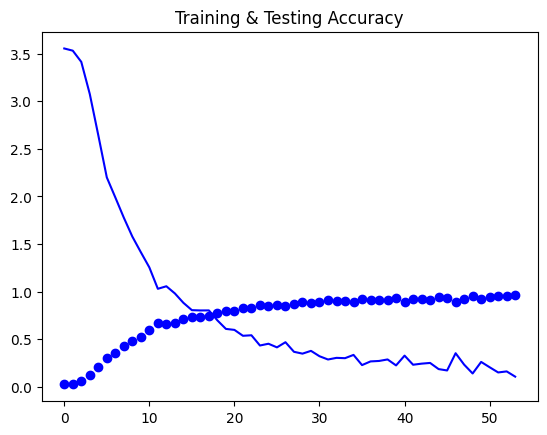

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/gdrive/MyDrive/Result_data_Face/FACE.h5')

1/1 [==============================] - 0s 164ms/step
ChiLoc


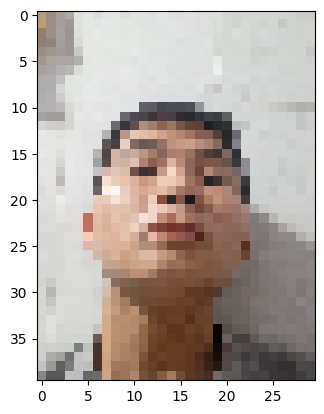

1/1 [==============================] - 0s 29ms/step
Hieu


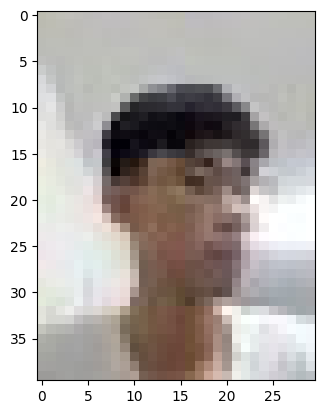

1/1 [==============================] - 0s 29ms/step
VuThach


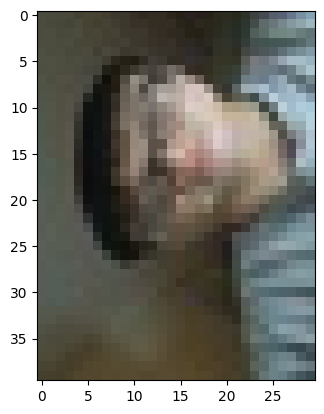

1/1 [==============================] - 0s 39ms/step
KhoaBui


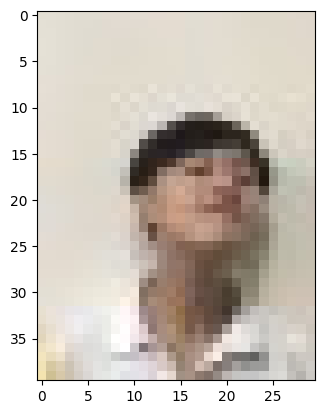

1/1 [==============================] - 0s 19ms/step
QuangPhuc


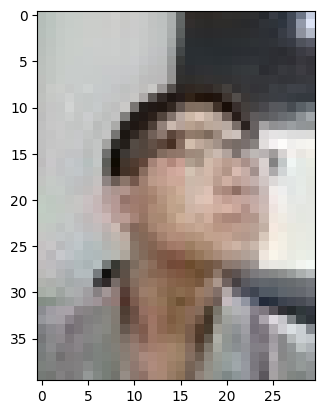

1/1 [==============================] - 0s 19ms/step
Trong


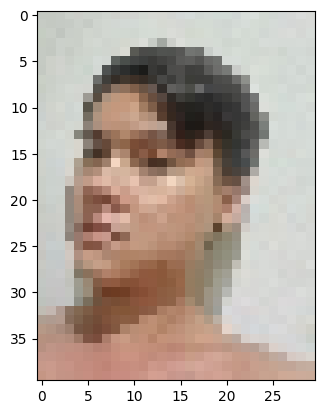

1/1 [==============================] - 0s 18ms/step
Van


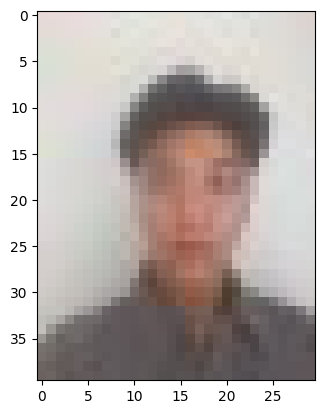

1/1 [==============================] - 0s 19ms/step
Hau


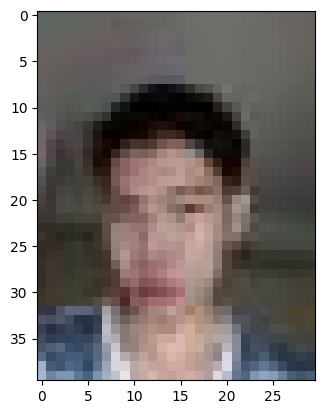

1/1 [==============================] - 0s 20ms/step
KyAnh


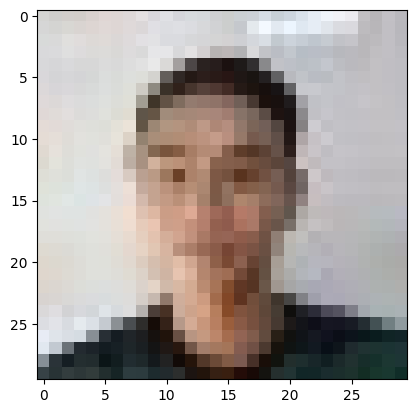

1/1 [==============================] - 0s 21ms/step
PhucDung


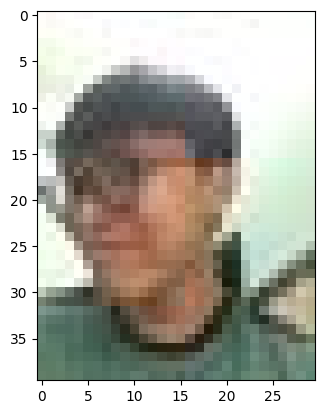

1/1 [==============================] - 0s 18ms/step
HoaiPhong


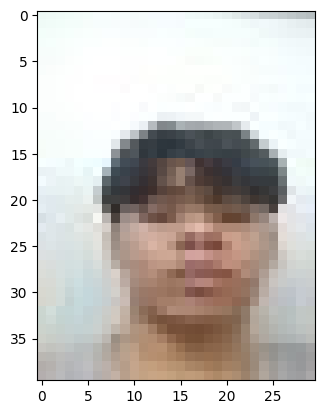

1/1 [==============================] - 0s 20ms/step
HuuLong


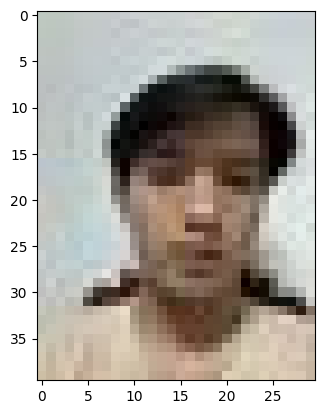

1/1 [==============================] - 0s 25ms/step
TanPhat


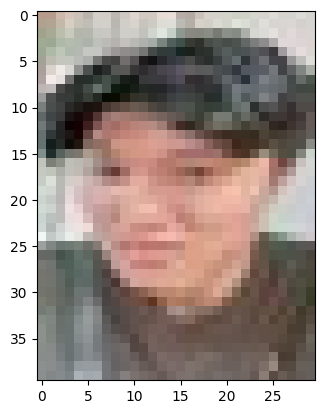

1/1 [==============================] - 0s 19ms/step
AnhKiet


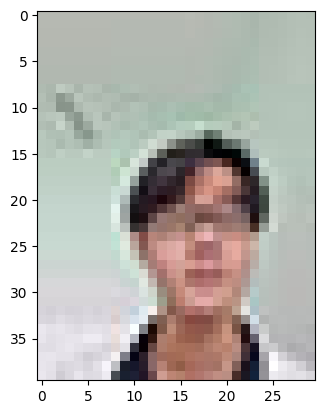

1/1 [==============================] - 0s 24ms/step
Thai


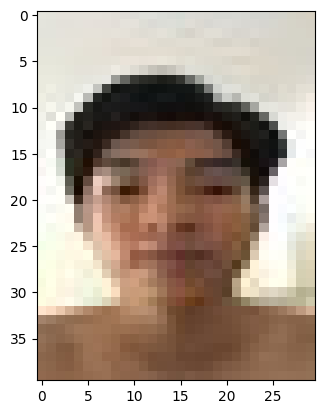

1/1 [==============================] - 0s 22ms/step
Binh


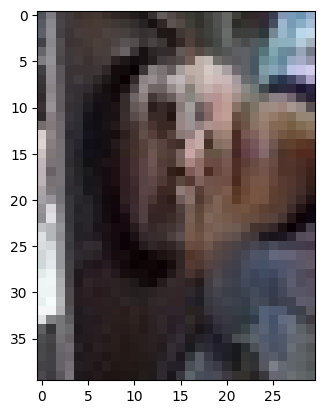

1/1 [==============================] - 0s 19ms/step
Phuc


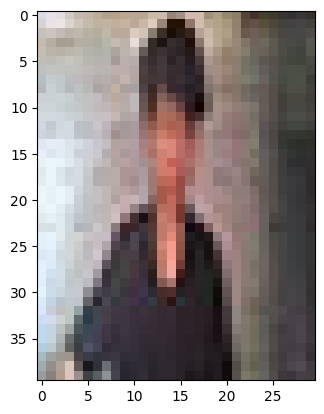

1/1 [==============================] - 0s 22ms/step
HQHuy


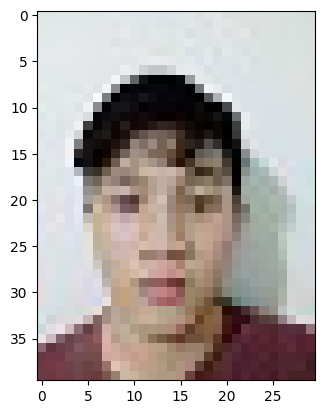

1/1 [==============================] - 0s 26ms/step
Thang


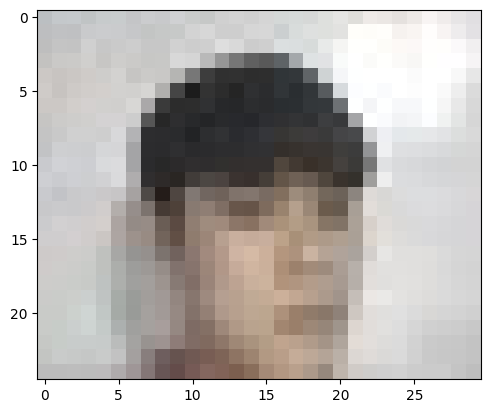

1/1 [==============================] - 0s 22ms/step
NgocThach


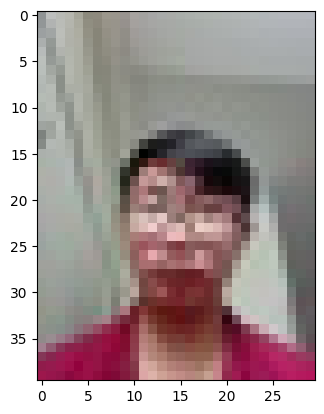

1/1 [==============================] - 0s 18ms/step
VietHa


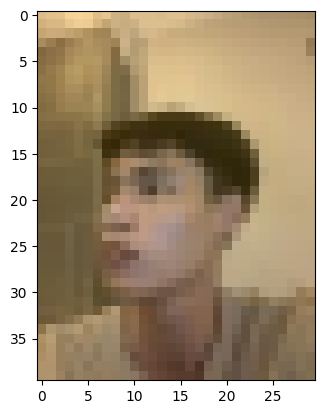

1/1 [==============================] - 0s 18ms/step
TanDat


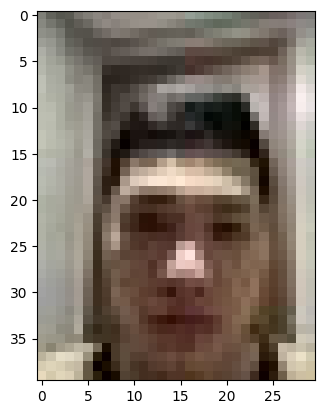

1/1 [==============================] - 0s 21ms/step
SonTung


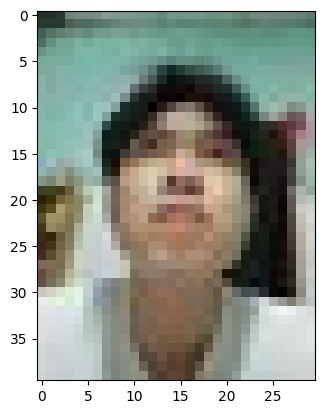

1/1 [==============================] - 0s 20ms/step
NhatSang


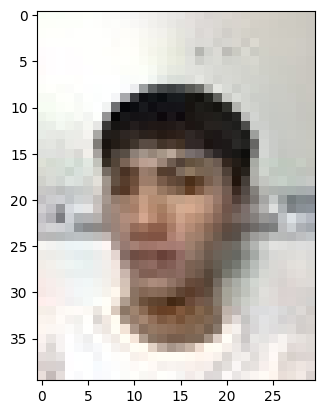

1/1 [==============================] - 0s 20ms/step
Tien


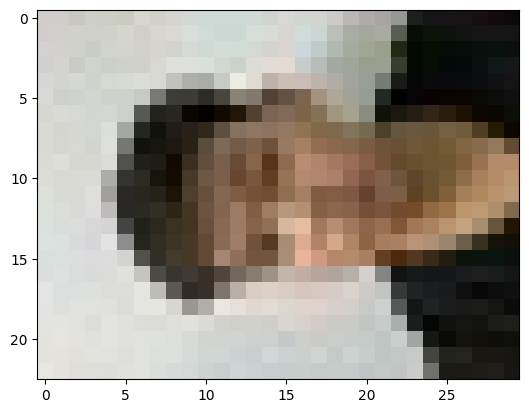

1/1 [==============================] - 0s 24ms/step
 


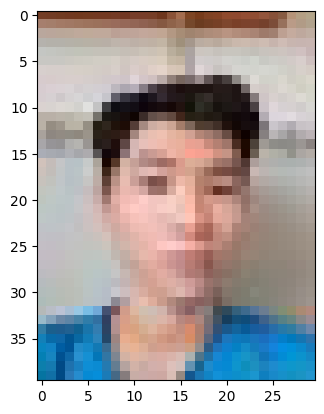

1/1 [==============================] - 0s 19ms/step
TuanKiet


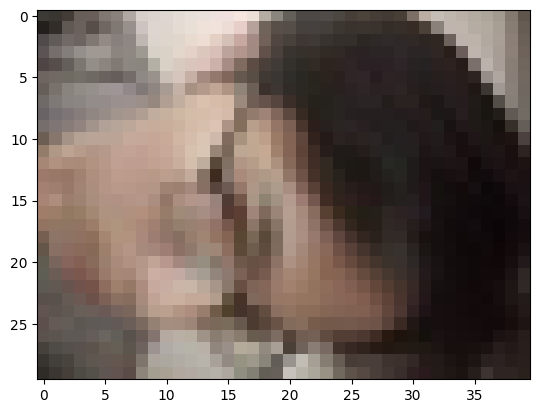

1/1 [==============================] - 0s 24ms/step
ChiLoc


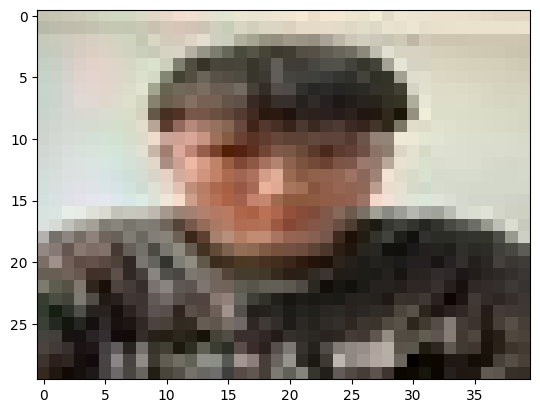

1/1 [==============================] - 0s 36ms/step
NhatHuy


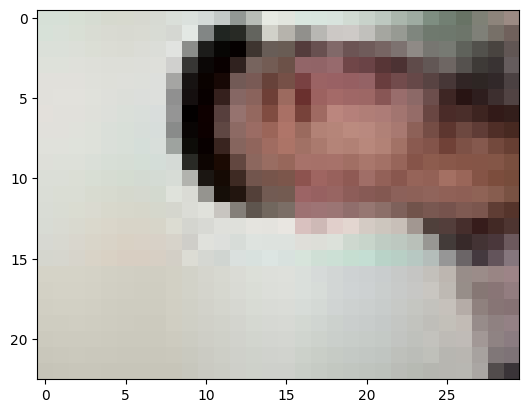

1/1 [==============================] - 0s 24ms/step
Luan


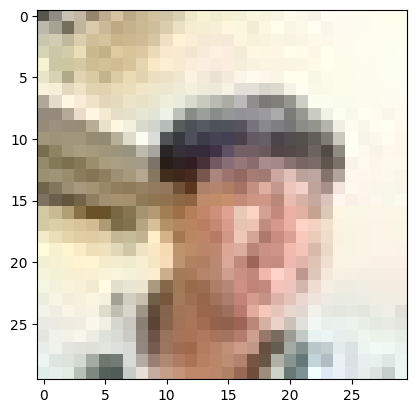

1/1 [==============================] - 0s 30ms/step
TanLoc


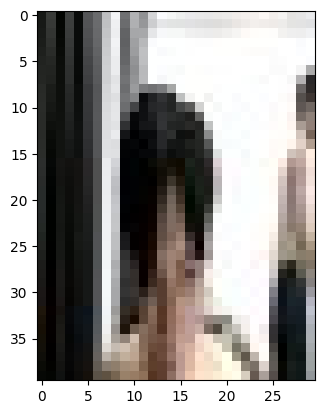

1/1 [==============================] - 0s 27ms/step
TanThinh


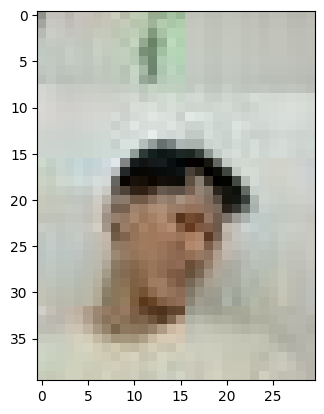

1/1 [==============================] - 0s 26ms/step
Thao


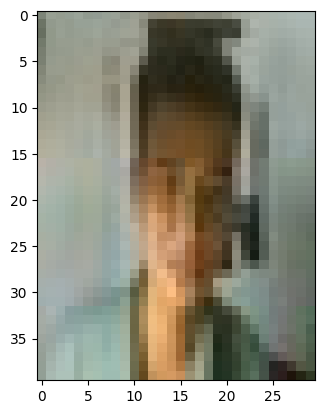

1/1 [==============================] - 0s 20ms/step
BuiKiet


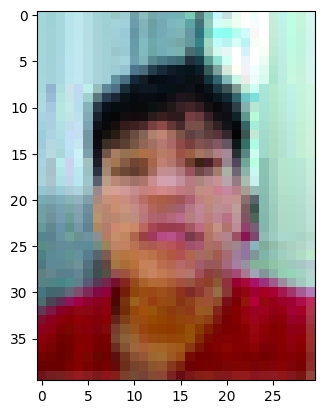

In [ ]:
#Testing
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array

folder = '/content/gdrive/MyDrive/Test_1'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (30, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  
  class_name=[' ','AnhKiet', 'Binh', 'BuiKiet', 'ChiLoc', 'HQHuy', 'Hau',
              'Hieu', 'HoaiPhong', 'HuuLong', 'KhoaBui', 'KyAnh', 'Luan',
              'NgocThach', 'NGuyenHoang', 'NhatHuy', 'NhatSang', 'Phuc',
              'PhucDung', 'QuangPhuc', 'SonTung', 'TanDat', 'TanLoc',
              'TanPhat', 'TanThinh', 'Thai', 'Thang', 'Thanh', 'Thao',
              'Tien', 'Trong', 'TuanKiet', 'Van', 'VietHa', 'VuThach']
  print(class_name[result])
  plt.show()